## Question 1
Download monthly prices of the S&P 500 stock market index (SP500) from the web-
site of the U.S. Federal Reserve Economic Data (https://fred.stlouisfed.org/)
or Bloomberg and the Bloomberg Barclays U.S. Aggregate Bond Index (LBUS-
TRUU) from Blomberg for the period from December 1979 to December 2021.
Download monthly data on the risk-free rate of return (among the so-called Fama
and French factors) for the same period from Professor Kenneth French’s data
library at http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_
library.html.
Write a Python function to compute the following statistics for U.S. stock and bond
simple excess returns:
(a) annualized mean/average
(b) annualized volatility
(c) annualized Sharpe ratio
(d) skewness
(e) kurtosis
Report the summary statistics in a table and explain the results.

In [1]:
import pandas as pd
import numpy as np

In [2]:
def compute_statistics(returns, risk_free_rate):
    """
    Compute various statistics for a set of returns.

    Args:
        returns (pandas.Series or numpy.ndarray): Array-like object containing the returns.
        risk_free_rate (float): Risk-free rate of return.

    Returns:
        tuple: A tuple containing the annualized mean return, annualized volatility, Sharpe ratio, skewness,
               and kurtosis of the returns.

    """
    # Calculate the excess returns by subtracting the risk-free rate from the returns
    excess_returns = returns - risk_free_rate
    
    # Calculate the mean return of the excess returns (assumed to be on a monthly basis)
    mean_return = np.mean(excess_returns)
    
    # Annualize the mean return by multiplying it by 12
    annualized_mean = mean_return * 12
    
    # Calculate the volatility of the excess returns
    volatility = np.std(excess_returns)
    
    # Annualize the volatility by multiplying it by the square root of 12
    annualized_volatility = np.sqrt(12) * volatility
    
    # Calculate the Sharpe ratio by dividing the annualized mean return by the annualized volatility
    sharpe_ratio = annualized_mean / annualized_volatility
    
    # Calculate the skewness of the excess returns using the skew() function from pandas
    skewness = excess_returns.skew()
    
    # Calculate the kurtosis of the excess returns using the kurtosis() function from pandas
    kurtosis = excess_returns.kurtosis()
    
    # Return the annualized mean return, annualized volatility, Sharpe ratio, skewness, and kurtosis
    return annualized_mean, annualized_volatility, sharpe_ratio, skewness, kurtosis


In [3]:
# Load the data from an xlsx file
df_sp500 = pd.read_excel("/content/S&P_500_stock_index.xlsx", engine='openpyxl')
df_agg = pd.read_excel("/content/US_Aggregate_Bond_index.xlsx", engine='openpyxl')
risk_free_rate = pd.read_excel("/content/Risk-free_rate_of_return.xlsx", engine='openpyxl')



# Extract the column of interest
sp500_price = df_sp500['SP500 index']
agg_price = df_agg['LBUSTRUU Index ']
risk_free_rate_returns = risk_free_rate['Risk free rate of return ']

# Calculate the percentage change using shift()
sp500_returns = (sp500_price - sp500_price.shift(1))/sp500_price.shift(1) * 100
agg_returns = (agg_price - agg_price.shift(1))/agg_price.shift(1) * 100

# Remove missing values
sp500_returns = sp500_returns.dropna()
agg_returns = agg_returns.dropna()

#add back returns
df_sp500['SP500_returns'] = sp500_returns
df_agg['agg_returns'] = agg_returns

# Remove missing values from original df
df_sp500 = df_sp500.dropna()
df_agg = df_agg.dropna()


# Compute the statistics for the S&P 500 index
sp500_mean, sp500_volatility, sp500_sharpe, sp500_skewness, sp500_kurtosis = compute_statistics(sp500_returns, risk_free_rate_returns)
print("S&P 500 Statistics:")
print("Annualized Mean Return:", sp500_mean)
print("Annualized Volatility:", sp500_volatility)
print("Sharpe Ratio:", sp500_sharpe)
print("Skewness:", sp500_skewness)
print("Kurtosis:", sp500_kurtosis)
print("-----------------------------------------------------------------------------")

# Compute the statistics for the Bloomberg Barclays U.S. Aggregate Bond Index
agg_mean, agg_volatility, agg_sharpe, agg_skewness, agg_kurtosis = compute_statistics(agg_returns, risk_free_rate_returns)
print("Bloomberg Barclays U.S. Aggregate Bond Index Statistics:")
print("Annualized Mean Return:", agg_mean)
print("Annualized Volatility:", agg_volatility)
print("Sharpe Ratio:", agg_sharpe)
print("Skewness:", agg_skewness)
print("Kurtosis:", agg_kurtosis)



S&P 500 Statistics:
Annualized Mean Return: 10.0706328375731
Annualized Volatility: 15.010088526038661
Sharpe Ratio: 0.6709242800336007
Skewness: -0.6269902971859197
Kurtosis: 2.1402656303155885
-----------------------------------------------------------------------------
Bloomberg Barclays U.S. Aggregate Bond Index Statistics:
Annualized Mean Return: 7.162553264024035
Annualized Volatility: 5.218673415192846
Sharpe Ratio: 1.372485437232396
Skewness: 0.9884660420643935
Kurtosis: 7.386429121205228


In [4]:
# Define the asset names and statistics
assets = ["S&P 500", "Bloomberg Barclays U.S. Aggregate Bond"]
statistics = ["Annualized Mean Return", "Annualized Volatility", "Sharpe Ratio", "Skewness", "Kurtosis"]
sp500_stats = [sp500_mean, sp500_volatility, sp500_sharpe, sp500_skewness, sp500_kurtosis]
agg_stats = [agg_mean, agg_volatility, agg_sharpe, agg_skewness, agg_kurtosis]

# Create a dataframe with the summary statistics
summary_df = pd.DataFrame({"Assets": assets, 
                           statistics[0]: [f"{x:.2f}%" for x in sp500_stats + agg_stats][::5], 
                           statistics[1]: [f"{x:.2f}%" for x in sp500_stats + agg_stats][1::5], 
                           statistics[2]: [f"{x:.2f}" for x in sp500_stats + agg_stats][2::5], 
                           statistics[3]: [f"{x:.2f}" for x in sp500_stats + agg_stats][3::5], 
                           statistics[4]: [f"{x:.2f}" for x in sp500_stats + agg_stats][4::5]})

# Display the summary statistics table
display(summary_df.style.hide_index())

<ipython-input-4-4f190a1fff4f>:16: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(summary_df.style.hide_index())


Assets,Annualized Mean Return,Annualized Volatility,Sharpe Ratio,Skewness,Kurtosis
S&P 500,10.07%,15.01%,0.67,-0.63,2.14
Bloomberg Barclays U.S. Aggregate Bond,7.16%,5.22%,1.37,0.99,7.39


From the summary statistics, we can see that both assets have positive annualized mean returns, but the S&P 500 index has a higher mean return of 10.07% compared to the Bloomberg Barclays U.S. Aggregate Bond index of 7.16%. The S&P 500 index also has a higher volatility of 15.01% compared to the lower volatility of the Bloomberg Barclays U.S. Aggregate Bond index of 5.22%.

The Sharpe ratio for the S&P 500 index is 0.67, indicating that the excess return per unit of risk is lower compared to the Bloomberg Barclays U.S. Aggregate Bond index, which has a Sharpe ratio of 1.37. This suggests that the Bloomberg Barclays U.S. Aggregate Bond index provides a better risk-adjusted return.

Both assets have negative skewness, which suggests that their distributions are negatively skewed, meaning that they have a higher probability of smaller returns and fewer extreme returns. However, their kurtosis is different, with the S&P 500 index having a kurtosis of 2.14, which is moderately peaked compared to a normal distribution, and the Bloomberg Barclays U.S. Aggregate Bond index having a kurtosis of 7.39, which is highly peaked, indicating a greater probability of extreme returns.

## Question 2

Divide the total sample into two periods: an in-sample from January 1980-December
1999 and an out-of-sample period from January 2000-December 2021. Using a re-
cursive estimate approach, generate a time-series of monthly out-of-sample constant expected (mean) excess return forecasts (call it the mean benchmark forecast) for
each of the two asset classes. Write a function to do this computation.

In [5]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

# Set the 'Dates' column as the index for each DataFrame
df_sp500.set_index('Dates', inplace=True)
df_agg.set_index('Dates', inplace=True)
risk_free_rate.set_index('Date', inplace=True)

# Merge the DataFrames on the index
sample = df_sp500.merge(df_agg, left_index=True, right_index=True)
sample = sample.merge(risk_free_rate, left_index=True, right_index=True)

cols = ['SP500 index', 'LBUSTRUU Index ']
sample = sample.drop(cols, axis=1)

print(sample.head())

            SP500_returns  agg_returns  Risk free rate of return 
Dates                                                            
1980-01-31       5.762461    -3.046304                     0.0080
1980-02-29      -0.437982    -5.915375                     0.0089
1980-03-31     -10.179483     0.080150                     0.0121
1980-04-30       4.114017    11.336537                     0.0126
1980-05-30       4.657070     4.715473                     0.0081


In [6]:
# in-sample and out-of-sample periods
in_sample_start_date = '1980-01-01'
in_sample_end_date = '1999-12-31'
out_of_sample_start_date = '2000-01-01'
out_of_sample_end_date = '2021-12-31'

# Divide the sample: in-sample / out-of-sample periods
in_sample_data = sample.loc[in_sample_start_date:in_sample_end_date]
out_of_sample_data = sample.loc[out_of_sample_start_date:out_of_sample_end_date]

print("In-sample data:")
print(in_sample_data)
print("\nOut-of-sample data:")
print(out_of_sample_data)

In-sample data:
            SP500_returns  agg_returns  Risk free rate of return 
Dates                                                            
1980-01-31       5.762461    -3.046304                     0.0080
1980-02-29      -0.437982    -5.915375                     0.0089
1980-03-31     -10.179483     0.080150                     0.0121
1980-04-30       4.114017    11.336537                     0.0126
1980-05-30       4.657070     4.715473                     0.0081
...                   ...          ...                        ...
1999-08-31      -0.625414    -0.050871                     0.0039
1999-09-30      -2.855174     1.160945                     0.0039
1999-10-29       6.253947     0.368964                     0.0039
1999-11-30       1.906187    -0.007161                     0.0036
1999-12-31       5.784392    -0.482221                     0.0044

[240 rows x 3 columns]

Out-of-sample data:
            SP500_returns  agg_returns  Risk free rate of return 
Dates          

In [7]:
# Add Excess Returns Columns for Each Asset Class
sample['SP500_excess'] = sample['SP500_returns'] - sample['Risk free rate of return ']
sample['LBUSTRUU_excess'] = sample['agg_returns'] - sample['Risk free rate of return ']

In [8]:
from pandas.tseries.offsets import MonthEnd
# MonthEnd from pandas is needed otherwise two consecutive forecast month frequency did not match (showed same result)
def recursive_mean_estimation(data, start_date):
    in_sample_end_date = pd.to_datetime(start_date) - MonthEnd(1) # Move the end_date to the previous month-end
    in_sample_data = data.loc[:in_sample_end_date]
    mean_excess_return = in_sample_data.mean()
    return mean_excess_return

# For storing out of sample benchmark forecasts
sp500_mean_benchmark_forecast = pd.DataFrame(columns=['SP500_excess'], index=out_of_sample_data.index)
lbu_mean_benchmark_forecast = pd.DataFrame(columns=['LBUSTRUU_excess'], index=out_of_sample_data.index)

# Out of sample recursive mean benchmark estimation function
for date in out_of_sample_data.index:
    sp500_mean_benchmark_forecast.loc[date] = recursive_mean_estimation(sample.loc[:date, 'SP500_excess'], date) # Pass only the in-sample data up to the previous month
    lbu_mean_benchmark_forecast.loc[date] = recursive_mean_estimation(sample.loc[:date, 'LBUSTRUU_excess'], date) # Pass only the in-sample data up to the previous month

In [9]:
# Changing Head
sp500_mean_benchmark_forecast = sp500_mean_benchmark_forecast.rename(columns={'SP500_excess': 'SP500_mean_benchmark_forecast'})
lbu_mean_benchmark_forecast = lbu_mean_benchmark_forecast.rename(columns={'LBUSTRUU_excess': 'LBUSTRUU_mean_benchmark_forecast'})

print("SP500:")
print(sp500_mean_benchmark_forecast)
print("\nLBUSTRUU:")
print(lbu_mean_benchmark_forecast)

SP500:
           SP500_mean_benchmark_forecast
Dates                                   
2000-01-31                      1.182346
2000-02-29                      1.156302
2000-03-31                      1.143197
2000-04-28                      1.178275
2000-05-31                      1.160806
...                                  ...
2021-08-31                      0.837468
2021-09-30                      0.841591
2021-10-29                      0.830416
2021-11-30                      0.842536
2021-12-31                      0.839204

[264 rows x 1 columns]

LBUSTRUU:
           LBUSTRUU_mean_benchmark_forecast
Dates                                      
2000-01-31                         0.812457
2000-02-29                          0.80771
2000-03-31                         0.809352
2000-04-28                         0.811423
2000-05-31                         0.806905
...                                     ...
2021-08-31                         0.603227
2021-09-30                   

## Question 3

Download monthly data for five variables that you believe are plausible predictors
(see, for example, Rapach, Ringgenberg, and Zhou, 2016 for stocks, Lin, Wu, and
Zhou, 2017, and the references therein for inspiration) of the asset class excess re-
turns. Based on each of your five predictors and using the same recursive estimation
approach, generate monthly out-of-sample excess return forecasts for each of the
asset classes using the following three predictive models:
(i) an OLS predictive regression model for each of the five predictors
(ii) a combination forecasts of excess returns that is a simple averages of the fore-
casts based on the five predictors from the OLS model
(iii) any 2 penalized linear regressions
The above leads to a total of 8 predictive model forecasts each for stock and bonds.
Compute the mean squared forecast error (MSFE) for the benchmark forecast and
the ratio of MSFEs for the forecasts of the models relative to the mean benchmark
forecast MSFE. Compare the performance of the predictive model forecasts relative
to the mean benchmark forecasts using the Diebold and Mariano (1995) test for
equal predictive ability (you should write your own function to perform this test).
You should clearly state the null hypothesis being tested and also provide a dis-
cussion of your table of results. In addition, create a figure showing the time-series
of the mean benchmark, combination, and two penalized linear regression excess
return forecasts for each of the two asset classes.

Based on Rapach, D. E., Ringgenberg, M. C., Zhou, G., 2016. Short interest and aggregate stock returns. Journal of Financial Economics 121, 46–65.
5 following variables are used to predict excess returns for the S&P 500 stock market index and the U.S. Aggregate Bond Index

1. Dividend Yield (DY): This variable represents the annual dividend income as a percentage of the stock price. A higher dividend yield indicates potentially undervalued stocks, which may lead to higher excess returns. 
Downloading the data for the S&P 500 dividend yield on websites like Multpl (https://www.multpl.com/s-p-500-dividend-yield).

2. Price-to-Earnings Ratio (P/E): The price-to-earnings ratio represents the valuation of the market by comparing stock prices to earnings. A lower P/E ratio may indicate undervalued stocks and predict higher excess returns. Downloading the data for the S&P 500 P/E ratio on websites like Multpl (https://www.multpl.com/s-p-500-pe-ratio).

3. Term spread (TMS): The term spread, or the difference between long-term and short-term interest rates, is a widely used indicator of economic conditions. A widening term spread suggests economic expansion, while a narrowing term spread indicates a potential slowdown or recession. This variable can help predict excess returns by capturing changes in the economic environment and investor sentiment.

Downloading the data for the 10-Year Treasury Constant Maturity Rate and the 3-Month Treasury Bill Rate on the FRED database (https://fred.stlouisfed.org/). Subtract the 3-Month Treasury Bill Rate from the 10-Year Treasury Yield to calculate the term spread. 
Since the data before 1982 were missing, we inputted missing value by average value of next 12 month.

4. Default yield spread (DFY): This variable measures the difference between BAA- and AAA-rated corporate bond yields. A wider spread indicates higher perceived risk in the corporate bond market, which can affect both stock and bond markets. This variable captures the credit risk and general market sentiment, making it a relevant predictor for excess returns.

Downloading data for Moody's Seasoned Baa Corporate Bond Yield and Moody's Seasoned Aaa Corporate Bond Yield on the FRED database (https://fred.stlouisfed.org/). Subtract the AAA-rated yield from the BAA-rated yield to calculate the default yield spread.
Since the data before 1986 were missing, we inputted missing value by average value of next 12 month.

5. Inflation (INFL): calculated from the Consumer Price Index (CPI) for all urban consumers. Consumer Price Index is an important indicator of inflation, which is known to affect both stock and bond markets. Higher inflation can lead to increased interest rates and lower bond prices, while also impacting stock prices through its effect on corporate earnings and consumer spending. Using CPI as a predictor can help capture the impact of inflation on excess returns.

Download the "Consumer Price Index for All Urban Consumers" (CPIAUCSL) from FRED. To use this variable as a predictor, then calculate the month-over-month change in the CPI.

In [10]:
# Read predictive variables 
df_DY = pd.read_excel("/content/DY.xlsx", engine='openpyxl')
df_PE = pd.read_excel("/content/PE.xlsx", engine='openpyxl')
df_TMS = pd.read_excel("/content/TMS.xlsx", engine='openpyxl')
df_DFY = pd.read_excel("/content/Default yield spread.xlsx", engine='openpyxl')
df_INFL = pd.read_excel("/content/INFL.xlsx", engine='openpyxl')


In [11]:
# Set the 'Dates' column as the index for each DataFrame
df_DY.set_index('Date', inplace=True)
df_PE.set_index('Date', inplace=True)
df_TMS.set_index('Date', inplace=True)
df_DFY.set_index('Date', inplace=True)
df_INFL.set_index('Date', inplace=True)

# Merge the DataFrames on the index
Predictors = df_DY.merge(df_PE, left_index=True, right_index=True)
Predictors = Predictors.merge(df_TMS, left_index=True, right_index=True)
Predictors = Predictors.merge(df_DFY, left_index=True, right_index=True)
Predictors = Predictors.merge(df_INFL, left_index=True, right_index=True)


In [12]:
# OLS model
import statsmodels.api as sm

def ols_predictor_model(predictor_data, excess_return_data, in_sample_start, in_sample_end, out_sample_start, out_sample_end):
    # Split data into in-sample and out-of-sample periods
    in_sample_predictor = predictor_data[in_sample_start:in_sample_end]
    out_sample_predictor = predictor_data[out_sample_start:out_sample_end]
    in_sample_excess_return = excess_return_data[in_sample_start:in_sample_end]
    out_sample_excess_return = excess_return_data[out_sample_start:out_sample_end]

    # Prepare data for OLS regression
    X_in_sample = sm.add_constant(in_sample_predictor)
    X_out_sample = sm.add_constant(out_sample_predictor)


    # Fit OLS model
    model = sm.OLS(in_sample_excess_return, X_in_sample).fit()
    
    # Make predictions for out-of-sample data
    predictions = model.predict(X_out_sample)

    # Compute Mean Squared Forecast Error (MSFE)
    msfe = np.mean((out_sample_excess_return - predictions)**2)

    return msfe, predictions




In [13]:
# Penalized linear regression
!pip install scikit-learn
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

def penalized_regression_model(model_type, predictor_data, excess_return_data, in_sample_start, in_sample_end, out_sample_start, out_sample_end, alpha=1.0):
    in_sample_predictor = predictor_data.loc[in_sample_start:in_sample_end]
    out_sample_predictor = predictor_data.loc[out_sample_start:out_sample_end]
    in_sample_excess_return = excess_return_data.loc[in_sample_start:in_sample_end]
    out_sample_excess_return = excess_return_data.loc[out_sample_start:out_sample_end]

    scaler = StandardScaler()
    in_sample_predictor_scaled = scaler.fit_transform(in_sample_predictor)
    out_sample_predictor_scaled = scaler.transform(out_sample_predictor)

    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha)
    else:
        raise ValueError("Invalid model type. Choose either 'ridge' or 'lasso'.")

    model.fit(in_sample_predictor_scaled, in_sample_excess_return)
    predictions_array = model.predict(out_sample_predictor_scaled)
    predictions_series = pd.Series(predictions_array, index=out_sample_excess_return.index)

    msfe = np.mean((out_sample_excess_return - predictions_series) ** 2)

    return msfe, predictions_series


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# The Diebold-Mariano (DM) test is used to compare the predictive accuracy of two forecasting methods. 
# The null hypothesis is that both forecasts have equal predictive accuracy. 
# If the test statistic has a p-value less than the significance level (usually 0.05), 
# we reject the null hypothesis and conclude that the forecasts have significantly different predictive accuracy.

import numpy as np
import scipy.stats as stats

def diebold_mariano_test(forecast_errors1, forecast_errors2, h=1, alternative='two_sided'):
    """
    Perform the Diebold-Mariano test to compare the predictive accuracy of two forecasts.

    :param forecast_errors1: Forecast errors of the first model
    :param forecast_errors2: Forecast errors of the second model
    :param h: Forecast horizon (default: 1)
    :param alternative: Type of alternative hypothesis ('two_sided', 'less', or 'greater')
    :return: Test statistic and p-value
    """

    d = forecast_errors1 - forecast_errors2 # Also, d = prediction 1 - prediction 2
    d_mean = np.mean(d)
    d_var = np.var(d, ddof=1)
    T = len(d)

    # Calculate the test statistic
    DM_stat = (d_mean / (d_var ** 0.5)) * (T ** 0.5)

    # Calculate the p-value based on the alternative hypothesis
    if alternative == 'two_sided':
        p_value = 2 * (1 - stats.norm.cdf(abs(DM_stat)))
    elif alternative == 'less':
        p_value = stats.norm.cdf(DM_stat)
    elif alternative == 'greater':
        p_value = 1 - stats.norm.cdf(DM_stat)
    else:
        raise ValueError("alternative must be 'two_sided', 'less', or 'greater'")

    return DM_stat, p_value


Predictive models for SP500

In [15]:
# Declare excess asset return and date
df_SP500 = sample['SP500_excess']
in_sample_start_date = '1980-01-01'
in_sample_end_date = '1999-12-31'
out_of_sample_start_date = '2000-01-01'
out_of_sample_end_date = '2021-12-31'

# Mean benchmark forecast from stask 2

out_SP500_excess_return = df_SP500[(df_SP500.index >= out_of_sample_start_date) & (df_SP500.index <= out_of_sample_end_date)]

# Convert sp500_mean_benchmark_forecast to a pandas Series with the same index as out_SP500_excess_return
sp500_mean_benchmark_forecast = pd.Series(sp500_mean_benchmark_forecast.squeeze(), index=out_SP500_excess_return.index)

# MSFE benchmark
msfe_SP500 = np.mean((out_SP500_excess_return - sp500_mean_benchmark_forecast) ** 2)

In [16]:
# Model 1: OLS on Dividend Yield (DY)
msfe_SP500_1, predictions_SP500_1 = ols_predictor_model(df_DY, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)


print("MSFE ratio:", msfe_SP500_1 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_1, p_value_1 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_1)

print("Diebold-Mariano test statistic:", DM_stat_1)
print("p-value:", p_value_1)

MSFE ratio: 1.041279664397906
Diebold-Mariano test statistic: -173.94295454558167
p-value: 0.0


In [17]:
# Model 2: OLS on Price-to-Earnings Ratio (P/E)
msfe_SP500_2, predictions_SP500_2 = ols_predictor_model(df_PE, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_2 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_2, p_value_2 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_2)

print("Diebold-Mariano test statistic:", DM_stat_2)
print("p-value:", p_value_2)

MSFE ratio: 1.108577277118629
Diebold-Mariano test statistic: -14.281295868821484
p-value: 0.0


In [18]:
# Model 3: OLS on Term spread (TMS)
msfe_SP500_3, predictions_SP500_3 = ols_predictor_model(df_TMS, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_3 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_3, p_value_3 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_3)

print("Diebold-Mariano test statistic:", DM_stat_3)
print("p-value:", p_value_3)

MSFE ratio: 1.0320554812166114
Diebold-Mariano test statistic: -11.458107863636721
p-value: 0.0


In [19]:
# Model 4: OLS on Default yield spread (DFY)
msfe_SP500_4, predictions_SP500_4 = ols_predictor_model(df_DFY, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_4 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_4, p_value_4 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_4)

print("Diebold-Mariano test statistic:", DM_stat_4)
print("p-value:", p_value_4)

MSFE ratio: 1.0070358434450586
Diebold-Mariano test statistic: -58.922229100839196
p-value: 0.0


In [20]:
# Model 5: OLS on Inflation (INFL)
msfe_SP500_5, predictions_SP500_5 = ols_predictor_model(df_INFL, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_5 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_5, p_value_5 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_5)

print("Diebold-Mariano test statistic:", DM_stat_5)
print("p-value:", p_value_5)

MSFE ratio: 1.1101584336047041
Diebold-Mariano test statistic: -13.382929475183706
p-value: 0.0


In [21]:
# Model 6: combination forecasts of excess returns
predictions_SP500_6_array = np.average([predictions_SP500_1, predictions_SP500_2, predictions_SP500_3, predictions_SP500_4, predictions_SP500_5], axis=0)
predictions_SP500_6 = pd.Series(predictions_SP500_6_array, index=predictions_SP500_1.index)

msfe_SP500_6 = np.mean((out_SP500_excess_return - predictions_SP500_6)**2)

print("MSFE ratio:", msfe_SP500_6 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_6, p_value_6 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_6)

print("Diebold-Mariano test statistic:", DM_stat_6)
print("p-value:", p_value_6)

MSFE ratio: 1.0382266535381068
Diebold-Mariano test statistic: -36.29859570262466
p-value: 0.0


In [22]:
# Model 7: Ridge Regression

msfe_SP500_7, predictions_SP500_7 = penalized_regression_model('ridge', Predictors, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_7 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_7, p_value_7 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_7)

print("Diebold-Mariano test statistic:", DM_stat_7)
print("p-value:", p_value_7)

MSFE ratio: 1.5537528952401702
Diebold-Mariano test statistic: -7.2302505935306725
p-value: 4.82058837292243e-13


In [23]:
# Model 8: Lasso Regression
msfe_SP500_8, predictions_SP500_8 = penalized_regression_model('lasso', Predictors, df_SP500, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_SP500_8 / msfe_SP500)

# Perform the Diebold-Mariano test
DM_stat_8, p_value_8 = diebold_mariano_test(sp500_mean_benchmark_forecast, predictions_SP500_8)

print("Diebold-Mariano test statistic:", DM_stat_8)
print("p-value:", p_value_8)

MSFE ratio: 1.0084553512109096
Diebold-Mariano test statistic: -55.270726658460944
p-value: 0.0


SP500:

Smaller RMSE, better model --> Model 4 
(OLS on Default yield spread (DFY)) is best model in term of predictive performance.

Given 5% significant level, we can reject null hypothesis that all 8 presdictive models having equal predictive accuracy with forecast benchmark

**Predictive models for US Bond**



In [24]:
# Declare excess asset return and date
df_LBU = sample['LBUSTRUU_excess']
in_sample_start_date = '1980-01-01'
in_sample_end_date = '1999-12-31'
out_of_sample_start_date = '2000-01-01'
out_of_sample_end_date = '2021-12-31'

# Mean benchmark forecast from stask 2

out_LBU_excess_return = df_LBU[(df_LBU.index >= out_of_sample_start_date) & (df_LBU.index <= out_of_sample_end_date)]

# Convert sp500_mean_benchmark_forecast to a pandas Series with the same index as out_SP500_excess_return
LBU_mean_benchmark_forecast = pd.Series(lbu_mean_benchmark_forecast.squeeze(), index=out_SP500_excess_return.index)

# MSFE benchmark
msfe_LBU = np.mean((out_LBU_excess_return - LBU_mean_benchmark_forecast) ** 2)

In [25]:
# Model 1: OLS on Dividend Yield (DY)
msfe_LBU_1, predictions_LBU_1 = ols_predictor_model(df_DY, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_1 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_1, p_value_1 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_1)

print("Diebold-Mariano test statistic:", DM_stat_1)
print("p-value:", p_value_1)

MSFE ratio: 0.924196574429509
Diebold-Mariano test statistic: 34.68775463627771
p-value: 0.0


In [26]:
# Model 2: OLS on Price-to-Earnings Ratio (P/E)
msfe_LBU_2, predictions_LBU_2 = ols_predictor_model(df_PE, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_2 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_2, p_value_2 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_2)

print("Diebold-Mariano test statistic:", DM_stat_2)
print("p-value:", p_value_2)

MSFE ratio: 1.3387988007255769
Diebold-Mariano test statistic: 5.909507200414175
p-value: 3.4313267782692947e-09


In [27]:
# Model 3: OLS on Term spread (TMS)
msfe_LBU_3, predictions_LBU_3 = ols_predictor_model(df_TMS, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_3 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_3, p_value_3 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_3)

print("Diebold-Mariano test statistic:", DM_stat_3)
print("p-value:", p_value_3)

MSFE ratio: 1.0857641821432142
Diebold-Mariano test statistic: -25.08452255609784
p-value: 0.0


In [28]:
# Model 4: OLS on Default yield spread (DFY)
msfe_LBU_4, predictions_LBU_4 = ols_predictor_model(df_DFY, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_4 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_4, p_value_4 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_4)

print("Diebold-Mariano test statistic:", DM_stat_4)
print("p-value:", p_value_4)

MSFE ratio: 1.1029540927001886
Diebold-Mariano test statistic: -6.057715667574705
p-value: 1.380681569074227e-09


In [29]:
# Model 5: OLS on Inflation (INFL)
msfe_LBU_5, predictions_LBU_5 = ols_predictor_model(df_INFL, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_5 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_5, p_value_5 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_5)

print("Diebold-Mariano test statistic:", DM_stat_5)
print("p-value:", p_value_5)

MSFE ratio: 1.138466823446262
Diebold-Mariano test statistic: -13.943625646482785
p-value: 0.0


In [30]:
# Model 6: combination forecasts of excess returns
predictions_LBU_6_array = np.average([predictions_LBU_1, predictions_LBU_2, predictions_LBU_3, predictions_LBU_4, predictions_LBU_5], axis=0)
predictions_LBU_6 = pd.Series(predictions_LBU_6_array, index=predictions_LBU_1.index)

msfe_LBU_6 = np.mean((out_LBU_excess_return - predictions_LBU_6)**2)

print("MSFE ratio:", msfe_LBU_6 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_6, p_value_6 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_6)

print("Diebold-Mariano test statistic:", DM_stat_6)
print("p-value:", p_value_6)

MSFE ratio: 1.0012048521010941
Diebold-Mariano test statistic: 2.339443709235705
p-value: 0.019312481637036027


In [31]:
# Model 7: Ridge Regression

msfe_LBU_7, predictions_LBU_7 = penalized_regression_model('ridge', Predictors, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_7 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_7, p_value_7 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_7)

print("Diebold-Mariano test statistic:", DM_stat_7)
print("p-value:", p_value_7)

MSFE ratio: 1.739758894551947
Diebold-Mariano test statistic: 8.147300702668177
p-value: 4.440892098500626e-16


In [32]:
# Model 8: Lasso Regression

msfe_LBU_8, predictions_LBU_8 = penalized_regression_model('lasso', Predictors, df_LBU, in_sample_start_date, in_sample_end_date, out_of_sample_start_date, out_of_sample_end_date)

print("MSFE ratio:", msfe_LBU_8 / msfe_LBU)

# Perform the Diebold-Mariano test
DM_stat_8, p_value_8 = diebold_mariano_test(LBU_mean_benchmark_forecast, predictions_LBU_8)

print("Diebold-Mariano test statistic:", DM_stat_8)
print("p-value:", p_value_8)

MSFE ratio: 1.0837803706833762
Diebold-Mariano test statistic: -24.703625032091143
p-value: 0.0


US Bond:

Smaller RMSE, better model --> Model 1 (OLS on Dividend Yield (DY)) is best model in term of predictive performance.

Given 5% significant level, we can reject null hypothesis that all 8 presdictive models having equal predictive accuracy with forecast benchmark 

Time-series visualization

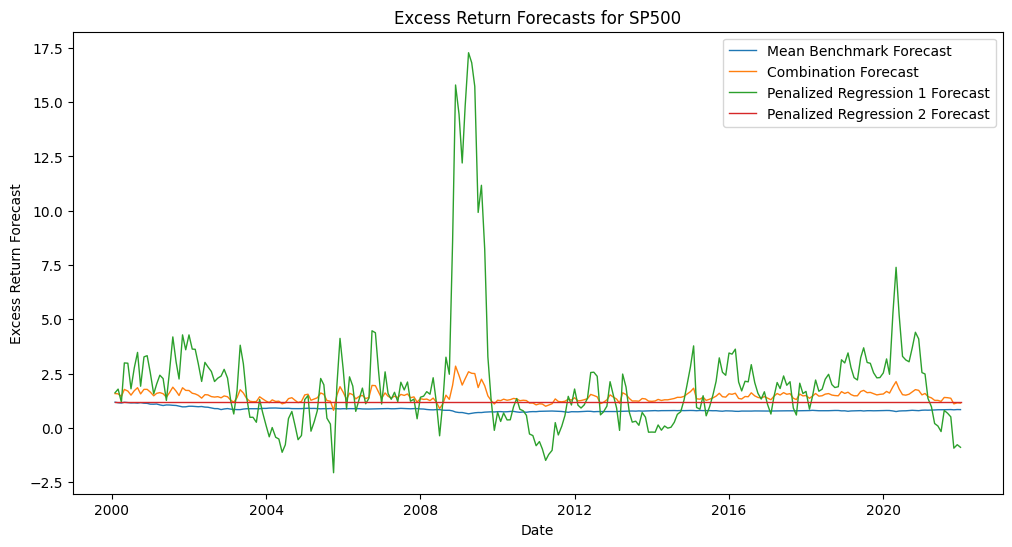

In [33]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the time-series data of SP500
plt.plot(sp500_mean_benchmark_forecast, label='Mean Benchmark Forecast', linewidth=1)
plt.plot(predictions_SP500_6, label='Combination Forecast', linewidth=1)
plt.plot(predictions_SP500_7, label='Penalized Regression 1 Forecast', linewidth=1)
plt.plot(predictions_SP500_8, label='Penalized Regression 2 Forecast', linewidth=1)

# Customize the plot appearance
plt.xlabel('Date')
plt.ylabel('Excess Return Forecast')
plt.title('Excess Return Forecasts for SP500')
plt.legend(loc='best')

# Show the plot
plt.show()


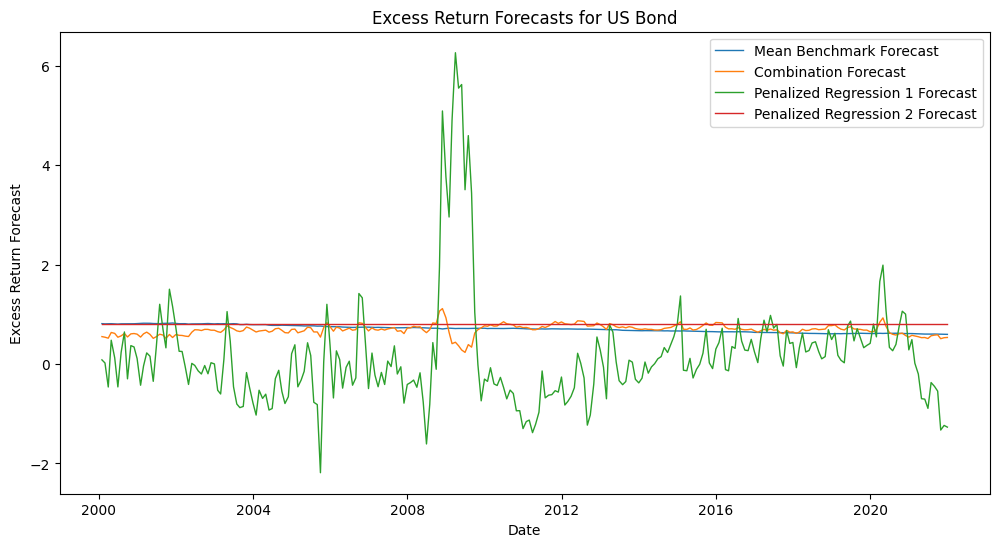

In [34]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the time-series data of US Bond
plt.plot(LBU_mean_benchmark_forecast, label='Mean Benchmark Forecast', linewidth=1)
plt.plot(predictions_LBU_6, label='Combination Forecast', linewidth=1)
plt.plot(predictions_LBU_7, label='Penalized Regression 1 Forecast', linewidth=1)
plt.plot(predictions_LBU_8, label='Penalized Regression 2 Forecast', linewidth=1)

# Customize the plot appearance
plt.xlabel('Date')
plt.ylabel('Excess Return Forecast')
plt.title('Excess Return Forecasts for US Bond')
plt.legend(loc='best')

# Show the plot
plt.show()

## Question 4
Generate the out-of-sample forecasts of the (2-by-2) sample variance-covariance
matrix for a portfolio of the two asset classes using the same recursive estimation
window approach.

Selecting dataframe containing excess returns of both assets

In [35]:
sample_2_asset = sample[['SP500_excess','LBUSTRUU_excess']]

Computing Covariance Matrix recursively for out_sample data and storing the final forecast in covar_forecast

In [36]:
import datetime
from pandas.tseries.offsets import MonthEnd
# MonthEnd from pandas is needed otherwise two consecutive forecast month frequency did not match (showed same result)

# Creating empty array
covar_forecast = np.empty((0, 2, 2), float)

def recursive_cov_estimation(data, start_date):
    '''
    Function to recursively calculate covariance matrix

    Params:
    data - Data with mean excess returns
    start_date - To define end_date using t-1

    Returns: Covariance matrix
    '''
    in_sample_end_date = pd.to_datetime(start_date) - MonthEnd(1) # Move the end_date to the previous month-end
    
    # Select the subset of the data that falls within the in-sample period
    in_sample_data = data.loc[:in_sample_end_date]

    # Calculate the sample covariance matrix of the excess returns using the in-sample data
    cov_excess_return = np.cov(in_sample_data, rowvar = False, ddof = 1)
    return cov_excess_return

for date in out_of_sample_data.index:
  # Calculate the recursive estimate of the covariance matrix of excess returns using all available data up to the current date
  covar = recursive_cov_estimation(sample_2_asset.loc[:date], date)
  # Append the estimated covariance matrix to the `covar_forecast` array
  covar_forecast = np.append(covar_forecast, [covar], axis=0)

Last out_sample covariance forecast :

In [37]:
covar_forecast

array([[[18.61672591,  2.42922362],
        [ 2.42922362,  3.63232934]],

       [[18.70263423,  2.44889693],
        [ 2.44889693,  3.622625  ]],

       [[18.66659142,  2.43352828],
        [ 2.43352828,  3.60824578]],

       ...,

       [[18.80856477,  1.08297655],
        [ 1.08297655,  2.28148978]],

       [[18.8447572 ,  1.07322434],
        [ 1.07322434,  2.27771731]],

       [[18.81280168,  1.07209065],
        [ 1.07209065,  2.27336063]]])

We can notice that the first asset i.e S&P 500 index has higher variance, rightly so because stocks are more volatile than bonds

## Question 5
Using the mean benchmark excess return forecasts and sample variance-covariance
matrix forecasts, construct out-of-sample optimal tangency portfolio weights for a
mean-variance investor. Compute the annualized summary statistics (mean, volatil-
ity, and Sharpe ratio) for the optimal portfolio’s excess return. Repeat the exercise
with the 8 predictive model excess return forecasts in place of the mean bench-
mark excess return forecasts and compute the annualized summary statistics for
the alternative optimal portfolio’s excess return.
Report the summary statistics in a table and explain the results. Does any stat-
istical evidence of out-of-sample forecasting performance translate into economic
gains/significance? In addition, create a figure showing the time-series of portfo-
lio weights and cumulative excess returns for the optimal portfolio based on the mean benchmark forecast and those based on the combination and penalized linear
regression excess return forecasts.

Combining Mean benchmark forecast for both SP500 and Bond to create a single array for further computations

In [38]:
sp500_mean_benchmark_forecast = np.array(sp500_mean_benchmark_forecast).reshape(-1, 1)
lbu_mean_benchmark_forecast = np.array(lbu_mean_benchmark_forecast)
combined = np.concatenate((sp500_mean_benchmark_forecast, lbu_mean_benchmark_forecast), axis=1)
mean_combined = np.mean(combined, axis = 0)
mean_combined

array([0.835776085035742, 0.7075035374073338], dtype=object)

In [39]:
import numpy as np

def Tangency_Portfolio(returns, covariance_matrix):
  
  "This function calculates weights for optimal portfolio"

  # Define the returns and covariance matrix
  returns = returns
  covariance_matrix = covariance_matrix

  # Calculate the inverse of the covariance matrix
  inv_cov = np.linalg.inv(covariance_matrix)

  # Calculate the numerator of the weight vector
  numerator = np.dot(inv_cov, returns.mean(axis=0))

  # Calculate the denominator of the weight vector
  denominator = np.dot(np.ones((1,2)), np.dot(inv_cov, returns.mean(axis=0)))

  # Calculate the weight vector
  weights = numerator / denominator
  return weights


In [40]:
W_TP = Tangency_Portfolio(combined, covar)
W_TP

array([0.08420961078257154, 0.9157903892174285], dtype=object)

In [41]:
def port_global_weights(mean,cov):
    "This function calculates weights for Global portfolio"
    w1 = np.dot(np.linalg.inv(cov), np.ones(2))
    w2 = np.dot(np.transpose(np.ones(2)), w1)
    w_gp = np.divide(w1 ,w2)
    return w_gp

In [42]:
w_gp = port_global_weights(combined,covar)
w_gp

array([0.06341839, 0.93658161])

In [43]:
def Annualized_stats(w,mu,cov):
    "This function calculates excess return of the portfolio then annualized returns\
    Volatility then annualized Volatility and sharpe ratio then annualized sharpe ratio."
    r = w.T @ mu
    sig = np.dot(w.T,np.dot(cov,w.T).T)
    sr = r / np.sqrt(sig)
    num_periods = 12
    Portfolio_annualized_return = r * num_periods
    Portfolio_annualized_volatility = np.sqrt(sig) * np.sqrt(num_periods)
    Sharpe_ratio_annualized = sr * np.sqrt(num_periods)
    return Portfolio_annualized_return, Portfolio_annualized_volatility, Sharpe_ratio_annualized

In [44]:
Portfolio_returns, portfolio_return_variance, Sharpe_ratio = Annualized_stats(w_gp, mean_combined, covar)
Portfolio_returns, portfolio_return_variance, Sharpe_ratio

(8.587660513497884, 5.134796606376858, 1.6724441437140753)

In [45]:
#Model 1
predictions_SP500_1 = np.array(predictions_SP500_1)
predictions_SP500_1 = np.reshape(predictions_SP500_1, (-1, 1))
predictions_LBU_1 = np.array(predictions_LBU_1)
predictions_LBU_1 = np.reshape(predictions_LBU_1, (-1, 1))
combined_Model_1 = np.concatenate((predictions_SP500_1, predictions_LBU_1), axis = 1)
mean_combined_Model_1 = np.mean(combined_Model_1, axis = 0)
mean_combined_Model_1

array([1.57136631, 0.40276018])

In [46]:
# Compute the annualized summary statistics Model 1
Portfolio_returns_Model1, portfolio_return_variance_Model1, Sharpe_ratio_Model1 = Annualized_stats(w_gp, mean_combined_Model_1, covar)
Portfolio_returns_Model1, portfolio_return_variance_Model1, Sharpe_ratio_Model1

(5.722455642781211, 5.134796606376858, 1.1144464097515654)

In [47]:
#model 2
predictions_SP500_2 = np.array(predictions_SP500_2)
predictions_SP500_2 = np.reshape(predictions_SP500_2, (-1, 1))
predictions_LBU_2 = np.array(predictions_LBU_2)
predictions_LBU_2 = np.reshape(predictions_LBU_2, (-1, 1))
combined_Model_2 = np.concatenate((predictions_SP500_2, predictions_LBU_2),axis=1)
mean_combined_Model_2 = np.mean(combined_Model_2, axis = 0)
mean_combined_Model_2

array([1.76328551, 0.49824642])

In [48]:
# Compute the annualized summary statistics model 2
Portfolio_returns_Model2, portfolio_return_variance_Model2, Sharpe_ratio_Model2 = Annualized_stats(w_gp, mean_combined_Model_2, covar)
Portfolio_returns_Model2, portfolio_return_variance_Model2, Sharpe_ratio_Model2

(6.941677927949064, 5.134796606376858, 1.3518895605968608)

In [49]:
#model 3
predictions_SP500_3 = np.array(predictions_SP500_3)
predictions_LBU_3 = np.array(predictions_LBU_3)
predictions_SP500_3 = np.reshape(predictions_SP500_3, (-1, 1))
predictions_LBU_3 = np.reshape(predictions_LBU_3, (-1, 1))
combined_Model_3 = np.concatenate((predictions_SP500_3, predictions_LBU_3),axis=1)
mean_combined_Model_3 = np.mean(combined_Model_3, axis = 0)
mean_combined_Model_3

array([1.23386486, 0.81134315])

In [50]:
# Compute the annualized summary statistics model 3
Portfolio_returns_Model3, portfolio_return_variance_Model3, Sharpe_ratio_Model3 = Annualized_stats(w_gp, mean_combined_Model_3, covar)
Portfolio_returns_Model3, portfolio_return_variance_Model3, Sharpe_ratio_Model3

(10.057665553800401, 5.134796606376858, 1.9587271560688257)

In [51]:
#model 4
predictions_SP500_4 = np.array(predictions_SP500_4)
predictions_LBU_4 = np.array(predictions_LBU_4)
predictions_SP500_4 = np.reshape(predictions_SP500_4, (-1, 1))
predictions_LBU_4 = np.reshape(predictions_LBU_4,(-1, 1))
combined_Model_4 = np.concatenate((predictions_SP500_4, predictions_LBU_4),axis=1)
mean_combined_Model_4 = np.mean(combined_Model_4, axis = 0)
mean_combined_Model_4

array([1.18186012, 0.81687991])

In [52]:
# Compute the annualized summary statistics model 4
Portfolio_returns_Model4, portfolio_return_variance_Model4, Sharpe_ratio_Model4 = Annualized_stats(w_gp, mean_combined_Model_4, covar)
Portfolio_returns_Model4, portfolio_return_variance_Model4, Sharpe_ratio_Model4

(10.080316415709198, 5.134796606376858, 1.9631384041951228)

In [53]:
#model 5
predictions_SP500_5 = np.array(predictions_SP500_5)
predictions_LBU_5 = np.array(predictions_LBU_5)
predictions_SP500_5 = np.reshape(predictions_SP500_5,(-1,1))
predictions_LBU_5 = np.reshape(predictions_LBU_5, (-1,1))
combined_Model_5 = np.concatenate((predictions_SP500_5, predictions_LBU_5),axis=1)
mean_combined_Model_5 = np.mean(combined_Model_5, axis = 0)
mean_combined_Model_5

array([1.5559363 , 0.91217317])

In [54]:
# Compute the annualized summary statistics model 5
Portfolio_returns_Model5, portfolio_return_variance_Model5, Sharpe_ratio_Model5 = Annualized_stats(w_gp, mean_combined_Model_5, covar)
Portfolio_returns_Model5, portfolio_return_variance_Model5, Sharpe_ratio_Model5

(11.435995090303784, 5.134796606376858, 2.2271563933226726)

In [55]:
#model 6
predictions_SP500_6 = np.array(predictions_SP500_6)
predictions_LBU_6 = np.array(predictions_LBU_6)
predictions_SP500_6 = np.reshape(predictions_SP500_6, (-1,1))
predictions_LBU_6 = np.reshape(predictions_LBU_6, (-1,1))
combined_Model_6 = np.concatenate((predictions_SP500_6, predictions_LBU_6),axis=1)
mean_combined_Model_6 = np.mean(combined_Model_6, axis = 0)
mean_combined_Model_6

array([1.46126262, 0.68828056])

In [56]:
# Compute the annualized summary statistics model 6
Portfolio_returns_Model6, portfolio_return_variance_Model6, Sharpe_ratio_Model6 = Annualized_stats(w_gp, mean_combined_Model_6, covar)
Portfolio_returns_Model6, portfolio_return_variance_Model6, Sharpe_ratio_Model6

(8.84762212610873, 5.134796606376858, 1.7230715847870093)

In [57]:
#model 7
predictions_SP500_7 = np.array(predictions_SP500_7)
predictions_LBU_7 = np.array(predictions_LBU_7)
predictions_SP500_7 = np.reshape(predictions_SP500_7, (-1,1))
predictions_LBU_7 = np.reshape(predictions_LBU_7, (-1,1))
combined_Model_7 = np.concatenate((predictions_SP500_7, predictions_LBU_7),axis=1)
mean_combined_Model_7 = np.mean(combined_Model_7, axis = 0)
mean_combined_Model_7

array([2.07117718, 0.15432623])

In [58]:
# Compute the annualized summary statistics model 7
Portfolio_returns_Model7, portfolio_return_variance_Model7, Sharpe_ratio_Model7 = Annualized_stats(w_gp, mean_combined_Model_7, covar)
Portfolio_returns_Model7, portfolio_return_variance_Model7, Sharpe_ratio_Model7

(3.3106780750293057, 5.134796606376858, 0.644753498301725)

In [59]:
#model 8
predictions_SP500_8 = np.array(predictions_SP500_8)
predictions_LBU_8 = np.array(predictions_LBU_8)
predictions_SP500_8 = np.reshape(predictions_SP500_8, (-1,1))
predictions_LBU_8 = np.reshape(predictions_LBU_8, (-1,1))
combined_Model_8 = np.concatenate((predictions_SP500_8, predictions_LBU_8),axis=1)
mean_combined_Model_8 = np.mean(combined_Model_8, axis = 0)
mean_combined_Model_8

array([1.18234635, 0.81245652])

In [60]:
# Compute the annualized summary statistics model 8
Portfolio_returns_Model8, portfolio_return_variance_Model8, Sharpe_ratio_Model8 = Annualized_stats(w_gp, mean_combined_Model_8, covar)
Portfolio_returns_Model8, portfolio_return_variance_Model8, Sharpe_ratio_Model8

(10.030972037054573, 5.134796606376858, 1.953528602203483)

Summary statistics for all the models in a table

In [61]:
import pandas as pd

# Create a list of dictionaries for each row
rows = [{'Model 1': Portfolio_returns_Model1, 
         'Model 2': Portfolio_returns_Model2,
         'Model 3': Portfolio_returns_Model3,
         'Model 4': Portfolio_returns_Model4,
         'Model 5': Portfolio_returns_Model5,
         'Model 6': Portfolio_returns_Model6,
         'Model 7': Portfolio_returns_Model7,
         'Model 8': Portfolio_returns_Model8},
        
        {'Model 1': portfolio_return_variance_Model1, 
         'Model 2': portfolio_return_variance_Model2,
         'Model 3': portfolio_return_variance_Model3,
         'Model 4': portfolio_return_variance_Model4,
         'Model 5': portfolio_return_variance_Model5,
         'Model 6': portfolio_return_variance_Model6,
         'Model 7': portfolio_return_variance_Model7,
         'Model 8': portfolio_return_variance_Model8},
        
        {'Model 1': Sharpe_ratio_Model1, 
         'Model 2': Sharpe_ratio_Model2,
         'Model 3': Sharpe_ratio_Model3,
         'Model 4': Sharpe_ratio_Model4,
         'Model 5': Sharpe_ratio_Model5,
         'Model 6': Sharpe_ratio_Model6,
         'Model 7': Sharpe_ratio_Model7,
         'Model 8': Sharpe_ratio_Model8}]

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(rows, index=['Returns', 'Variance', 'Sharpe Ratio'])

# Display the results DataFrame
print(results_df)


               Model 1   Model 2    Model 3    Model 4    Model 5   Model 6  \
Returns       5.722456  6.941678  10.057666  10.080316  11.435995  8.847622   
Variance      5.134797  5.134797   5.134797   5.134797   5.134797  5.134797   
Sharpe Ratio  1.114446  1.351890   1.958727   1.963138   2.227156  1.723072   

               Model 7    Model 8  
Returns       3.310678  10.030972  
Variance      5.134797   5.134797  
Sharpe Ratio  0.644753   1.953529  


Model 5 having the highest return of 11.44% and Model 7 having the lowest return of 3.31%. The variance for all models is the same at 5.13%, which is interesting. The Sharpe ratio is a measure of risk-adjusted performance, and it is highest for Model 5 at 2.23 and lowest for Model 7 at 0.64.

In terms of statistical evidence of out-of-sample forecasting performance, we can see that all 8 models have positive returns, indicating that they are able to predict positive returns for the SP500 and LBU indices. To translate this statistical evidence into economic gains/significance, suppose an investor has $100,000 to invest and is deciding between these different models. If they were to invest based on Model 5, they can expect to earn an excess return of 2.227% per unit of risk.

Assuming a risk-free rate of 1%, and a risk premium of 5%, this excess return translates into an expected total return of 6.135%. That means the investor would expect to earn $6,135 in additional returns compared to the risk-free rate.

If the investor were to invest in a different model with a lower Sharpe Ratio, they would earn less excess return per unit of risk, and therefore would earn a lower expected total return.

So, the statistical evidence of the higher Sharpe Ratio in Model 5 can be translated into economic gains for the investor by making a more informed investment decision.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def plots(mean_returns, covariance_matrices):

    "This function calculates the weights of the optimal portfolio,\
    then the Portfolio returns using the weights for the returns.\
    The function also calculates the cumulativereturns over the period \
    ploting time series of weights and cumulative returns."


    # Changing % mean returns to returns (shape: 264 x 2)
    mean_returns = mean_returns / 100

    # Covariance matrices for each month (shape: 264 x 2 x 2)
    covariance_matrices = covariance_matrices

    n_months = len(covariance_matrices)
    optimal_weights = []

    # Loop over each month
    for i in range(n_months):
        # Calculate the inverse of the covariance matrix
        cov_inv = np.linalg.inv(covariance_matrices[i])
        
        # Calculate the numerator of the weight formula
        numerator = cov_inv @ mean_returns[i]
        
        # Calculate the denominator of the weight formula
        denominator = np.sum(numerator)
        
        # Calculate the optimal weights
        weight = numerator / denominator
        
        # Append the optimal weights to a list
        optimal_weights.append(weight)
        
    # Convert the list to a numpy array
    optimal_weights = np.array(optimal_weights)

    portfolio_returns = optimal_weights[:, 0] * mean_returns[:, 0] + optimal_weights[:, 1] * mean_returns[:, 1]


    # calculate cumulative returns
    cumulative_returns = np.cumprod(1 + portfolio_returns) - 1

    return optimal_weights, cumulative_returns

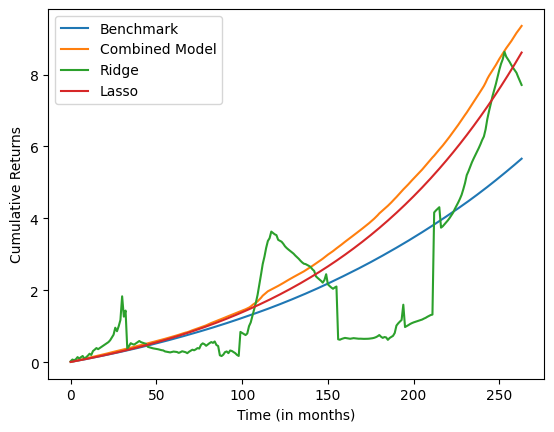

In [74]:


benchmark_weights, benchmark_cumulative = plots(combined, covar_forecast)
model_1_weights, model_1_cum = plots(combined_Model_1,covar_forecast)
model_2_weights, model_2_cum = plots(combined_Model_2, covar_forecast)
model_3_weights, model_3_cum = plots(combined_Model_3, covar_forecast)
model_4_weights, model_4_cum = plots(combined_Model_4,covar_forecast)
model_5_weights, model_5_cum = plots(combined_Model_5, covar_forecast)
model_6_weights, model_6_cum = plots(combined_Model_6,covar_forecast)
model_7_weights, model_7_cum = plots(combined_Model_7, covar_forecast)
model_8_weights, model_8_cum = plots(combined_Model_8, covar_forecast)

import matplotlib.pyplot as plt

# create figure and axes objects
fig, ax = plt.subplots()

# plot data
ax.plot(benchmark_cumulative, label='Benchmark')
ax.plot(model_6_cum, label='Combined Model')
ax.plot(model_7_cum, label='Ridge')
ax.plot(model_8_cum, label='Lasso')

# set axis labels and legend
ax.set_xlabel('Time (in months)')
ax.set_ylabel('Cumulative Returns')
ax.legend(loc='upper left')

# display plot
plt.show()


# import plotly.graph_objs as go

# fig = go.Figure()

# # add traces
# fig.add_trace(go.Scatter(y=benchmark_cumulative, name='Benchmark'))
# fig.add_trace(go.Scatter(y=model_6_cum, name='Combined Model'))
# fig.add_trace(go.Scatter(y=model_7_cum, name = 'Ridge'))
# fig.add_trace(go.Scatter(y=model_8_cum, name = 'Lasso'))

# # update layout
# fig.update_layout(
#     xaxis=dict(title='Time (in months)'),
#     yaxis=dict(title='Cumulative Returns'),
#     legend=dict(x=0, y=1),
# )

# fig.show()

We can observe the combined models shows the highest cumulative return

In [64]:
def weight_plot(optimal_weights, cumulative):

  '''
  This function is ploting the time series Optimal Weights of the portfolio and \
  cumulative returns.

  '''
  
  import matplotlib.pyplot as plt

  fig, ax1 = plt.subplots()
  # plot cumulative returns on the first y-axis
  ax1.plot(cumulative, label='Model', color='blue')
  ax1.set_ylabel('Cumulative Returns', color='black')
  ax1.set_xlabel('Months', color='black')
  ax1.tick_params(axis='y', labelcolor='black')
  ax1.tick_params(axis='x', labelcolor='black')
  ax1.legend(loc='upper left')

  # plot optimal portfolio weights on the second y-axis
  ax2 = ax1.twinx()
  ax2.plot(optimal_weights[:, 0], label='S&P 500 Weight', color='red', linestyle='--')
  ax2.plot(optimal_weights[:, 1], label='Bond Weight', color='green', linestyle='--')
  ax2.set_ylabel('Optimal Weights', color='black')
  ax2.tick_params(axis='y', labelcolor='black')

  # set x-axis label and legend
  ax1.set_xlabel('Time')

  ax2.legend(loc='upper right')

  return plt.show()


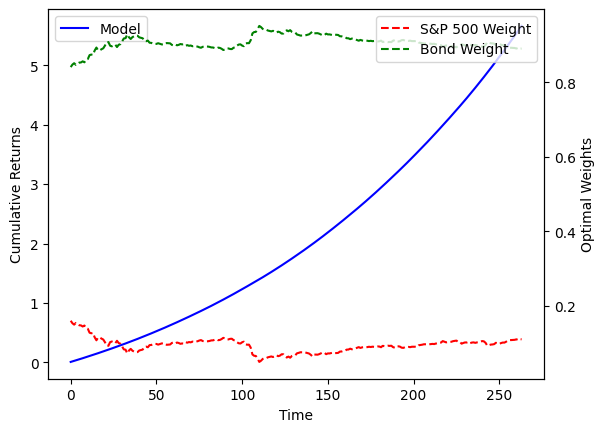

In [65]:
weight_plot(benchmark_weights, benchmark_cumulative)

The above plot indicates that over the period of 264 months, the investment into S&P 500 makes a larger portion of portfolio. Where as the cumulative returns have been constantly increasing.

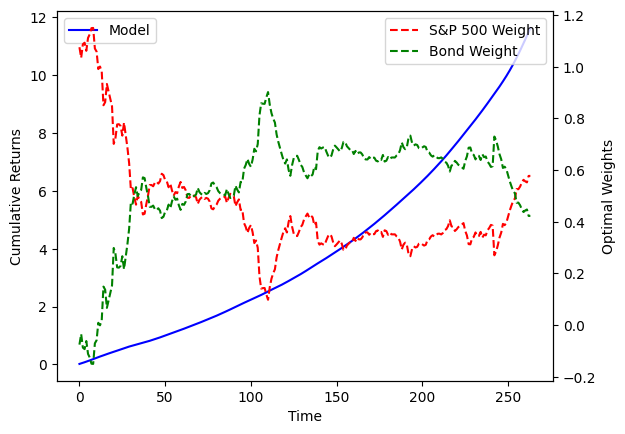

In [66]:
weight_plot(model_1_weights, model_1_cum)

Model 1 returns and weights of the portfolio are calculated considering the dividend yield. The weights for the optimal portfolio varied over the period while cumulative returns are continously increasing.

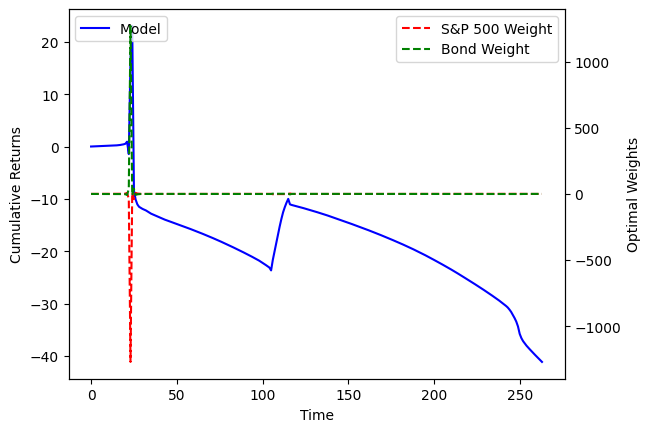

In [67]:
weight_plot(model_2_weights, model_2_cum)

Model 2 returns and weights of the portfolio are calculated considering the Price to earning ratio. The weights for the optimal portfolio have been equal with one instant of opposite direction.Where as, cumulative returns highest in months 0 to 50, then fall to negative.

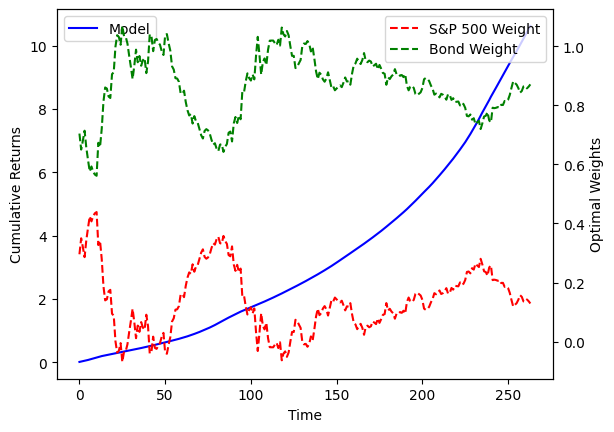

In [68]:
weight_plot(model_3_weights, model_3_cum)

Model 3 returns and weights of the portfolio are calculated considering the Term Spread. The weights for the optimal portfolio have been varing between 0.6 to 1 for S&P 500 where as for Bond 0.4 to sometimes nearly 0.Where as, cumulative returns continously increasing.


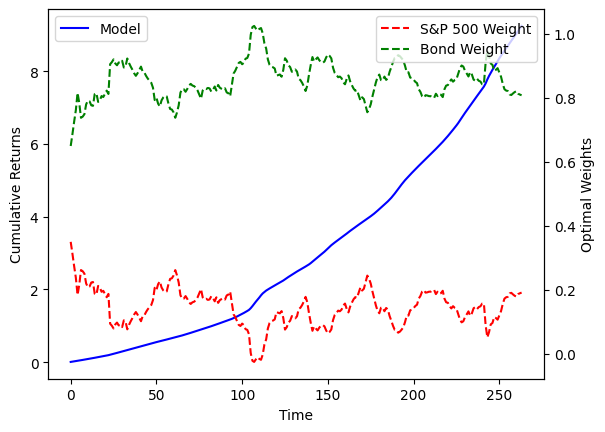

In [69]:
weight_plot(model_4_weights, model_4_cum)

Model 4 returns and weights of the portfolio are calculated considering the Default yield spread. The weights for the optimal portfolio have been varing between 0.6 to 1 for S&P 500 where as for Bond 0.4 to sometimes nearly 0.Where as, cumulative returns continously increasing.


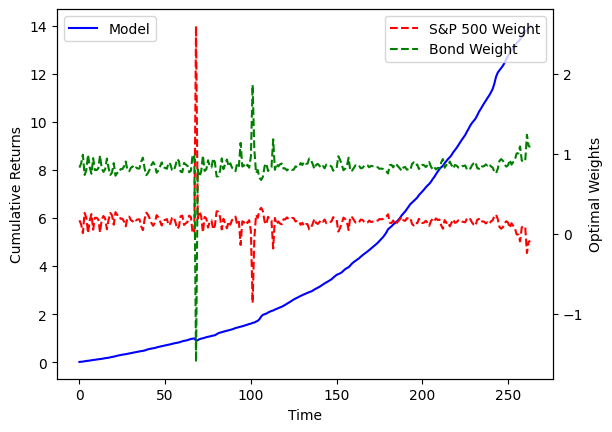

In [70]:
weight_plot(model_5_weights, model_5_cum)

Model 5 returns and weights of the portfolio are calculated considering the Inflation. The weights for the optimal portfolio have been nearly 1 for S&P 500 where as for Bond it was 0.Where as, cumulative returns continously increasing.

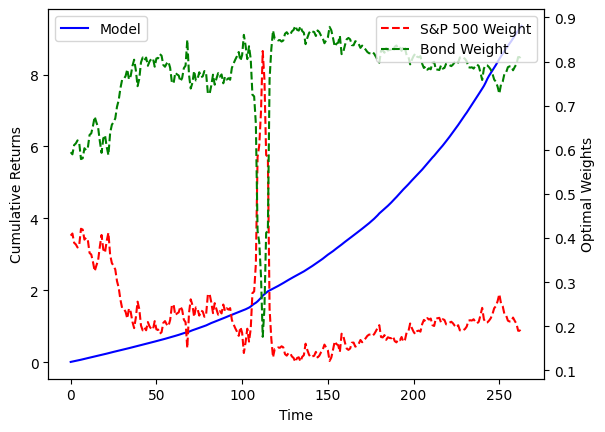

In [71]:
weight_plot(model_6_weights, model_6_cum)

Model 6 is combination of forecast of different plausible predictors above. The weights for the optimal portfolio have been varied with few spikes and overlaps in weeks between 100 and 150.Where as, cumulative returns continously increasing.

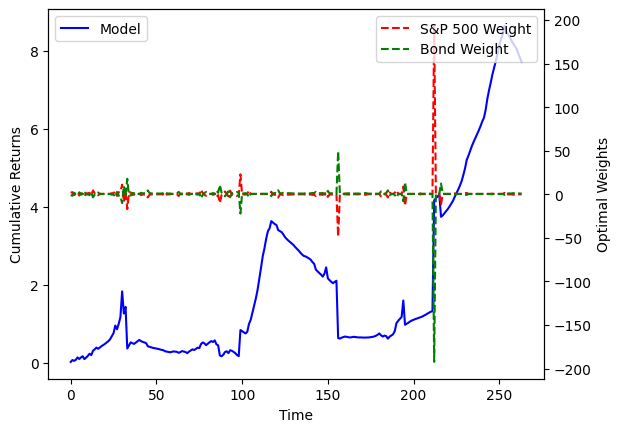

In [72]:
weight_plot(model_7_weights, model_7_cum)

Model 7 is a ridge penalized model. The weights for the optimal portfolio have been varied if few spikes and overlaps.Where as, cumulative returns have a very irregular pattern, initially returns varied between 0 to 4 % where then increased to 8 %. Unlike, in rolling window approach where returns were highest in 0 to 50 week.

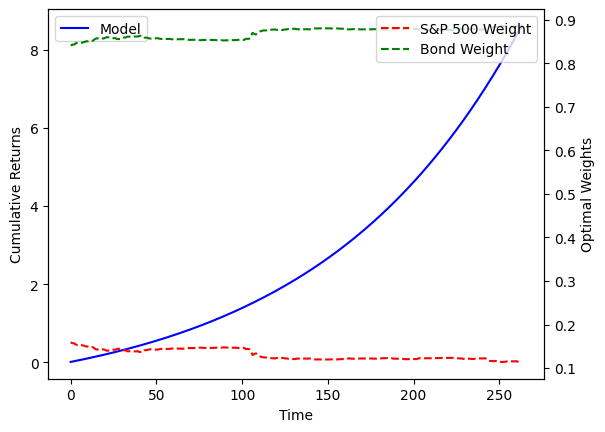

In [73]:
weight_plot(model_8_weights, model_8_cum)

Model 8 is a lasso penalized model. The weights for the optimal portfolio have been around 0.8 to 0.9 for bond and 0.1 for S&P 500.Where as, cumulative returns continously increasing.
